In [82]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.stats import skew, kurtosis
import glob
import os
import matplotlib.pyplot as plt
from IPython.display import display

In [43]:
custinfo = pd.read_csv('E:/Datasets/Fintech/TrainingDataset_first/public_train_x_custinfo_full_hashed.csv')
cdtx = pd.read_csv('E:/Datasets/Fintech/TrainingDataset_first/public_train_x_cdtx0001_full_hashed.csv')
dp = pd.read_csv('E:/Datasets/Fintech/TrainingDataset_first/public_train_x_dp_full_hashed.csv')
dp.rename(columns={'tx_date': 'date'}, inplace=True)
remit = pd.read_csv('E:/Datasets/Fintech/TrainingDataset_first/public_train_x_remit1_full_hashed.csv')
remit.rename(columns={'trans_date': 'date'}, inplace=True)
alert_pub = pd.read_csv('E:/Datasets/Fintech/TrainingDataset_first/public_x_alert_date.csv')
alert_train = pd.read_csv('E:/Datasets/Fintech/TrainingDataset_first/train_x_alert_date.csv')
alert =pd.concat([alert_pub, alert_train])
label = pd.read_csv('E:/Datasets/Fintech/TrainingDataset_first/train_y_answer.csv')
custs = custinfo.cust_id.unique()

In [83]:
def plot_trans(df, label, width=0.35):
    fig = plt.figure(figsize=(100,100))
    idx = np.arange(df.date.values[0], df.date.values[-1]+1)
    plt.bar(idx, np.zeros(len(idx)))
    for i in range(len(df)):
        data = df.iloc[i,:]
        if data.debit_credit == 'DB':
            plt.bar(data.date, data.tx_amt, width, bottom=df.iloc[:i,:][(df.date==data.date)&(df.debit_credit=='DB')].tx_amt.sum(), color='grey', edgecolor='black')
            bottom=df.iloc[:i,:][(df.date==data.date)&(df.debit_credit=='DB')]
        elif data.debit_credit == 'CR':
            plt.bar(data.date+width, data.tx_amt, width, bottom=df.iloc[:i,:][(df.date==data.date)&(df.debit_credit=='CR')].tx_amt.sum(), color='silver', edgecolor='black')
            bottom=df.iloc[:i,:][(df.date==data.date)&(df.debit_credit=='CR')]
        if bottom.tx_amt.sum() < 0:
            display(bottom)
    for i in range(len(label)):
        l = label.iloc[i,:]
        if l.sar_flag==1:
            plt.axvline(l.date+width/2, color='red')
        else:
            plt.axvline(l.date+width/2, color='green')
    plt.xticks(idx+width/2, labels=idx)
    plt.show()


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,cust_id,debit_credit,date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
278440,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,11,2,72702.0,4.361,20,NaN,NaN,0,1
278303,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,22,2,50375.0,4.368,20,NaN,NaN,0,1
278301,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,14,2,14143.0,4.364,20,NaN,NaN,0,1
280486,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,10,2,2510.0,27.765,20,NaN,NaN,0,1
278466,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,6,2,4712.0,27.785,20,NaN,NaN,0,1
280395,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,9,2,313768.0,1.000,20,NaN,NaN,0,1
280472,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,11,2,8751.0,1.000,20,NaN,NaN,0,1
278243,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,8,2,1039.0,27.785,20,NaN,NaN,0,1
280426,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,22,2,2084.0,1.000,20,NaN,NaN,0,1
280578,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,10,2,-1034761.0,27.765,20,NaN,NaN,0,1


c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,cust_id,debit_credit,date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
278440,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,11,2,72702.0,4.361,20,NaN,NaN,0,1
278303,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,22,2,50375.0,4.368,20,NaN,NaN,0,1
278301,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,14,2,14143.0,4.364,20,NaN,NaN,0,1
280486,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,10,2,2510.0,27.765,20,NaN,NaN,0,1
278466,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,6,2,4712.0,27.785,20,NaN,NaN,0,1
280395,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,9,2,313768.0,1.000,20,NaN,NaN,0,1
280472,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,11,2,8751.0,1.000,20,NaN,NaN,0,1
278243,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,8,2,1039.0,27.785,20,NaN,NaN,0,1
280426,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,22,2,2084.0,1.000,20,NaN,NaN,0,1
280578,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,10,2,-1034761.0,27.765,20,NaN,NaN,0,1


c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,cust_id,debit_credit,date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
278440,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,11,2,72702.0,4.361,20,NaN,NaN,0,1
278303,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,22,2,50375.0,4.368,20,NaN,NaN,0,1
278301,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,14,2,14143.0,4.364,20,NaN,NaN,0,1
280486,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,10,2,2510.0,27.765,20,NaN,NaN,0,1
278466,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,6,2,4712.0,27.785,20,NaN,NaN,0,1
280395,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,9,2,313768.0,1.000,20,NaN,NaN,0,1
280472,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,11,2,8751.0,1.000,20,NaN,NaN,0,1
278243,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,8,2,1039.0,27.785,20,NaN,NaN,0,1
280426,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,22,2,2084.0,1.000,20,NaN,NaN,0,1
280578,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,10,2,-1034761.0,27.765,20,NaN,NaN,0,1


c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,cust_id,debit_credit,date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
278440,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,11,2,72702.0,4.361,20,NaN,NaN,0,1
278303,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,22,2,50375.0,4.368,20,NaN,NaN,0,1
278301,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,14,2,14143.0,4.364,20,NaN,NaN,0,1
280486,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,10,2,2510.0,27.765,20,NaN,NaN,0,1
278466,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,6,2,4712.0,27.785,20,NaN,NaN,0,1
280395,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,9,2,313768.0,1.000,20,NaN,NaN,0,1
280472,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,11,2,8751.0,1.000,20,NaN,NaN,0,1
278243,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,8,2,1039.0,27.785,20,NaN,NaN,0,1
280426,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,22,2,2084.0,1.000,20,NaN,NaN,0,1
280578,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,10,2,-1034761.0,27.765,20,NaN,NaN,0,1


c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,cust_id,debit_credit,date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
278440,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,11,2,72702.0,4.361,20,NaN,NaN,0,1
278303,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,22,2,50375.0,4.368,20,NaN,NaN,0,1
278301,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,14,2,14143.0,4.364,20,NaN,NaN,0,1
280486,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,10,2,2510.0,27.765,20,NaN,NaN,0,1
278466,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,6,2,4712.0,27.785,20,NaN,NaN,0,1
280395,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,9,2,313768.0,1.000,20,NaN,NaN,0,1
280472,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,11,2,8751.0,1.000,20,NaN,NaN,0,1
278243,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,8,2,1039.0,27.785,20,NaN,NaN,0,1
280426,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,22,2,2084.0,1.000,20,NaN,NaN,0,1
280578,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,10,2,-1034761.0,27.765,20,NaN,NaN,0,1


c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,cust_id,debit_credit,date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
278440,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,11,2,72702.0,4.361,20,NaN,NaN,0,1
278303,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,22,2,50375.0,4.368,20,NaN,NaN,0,1
278301,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,14,2,14143.0,4.364,20,NaN,NaN,0,1
280486,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,10,2,2510.0,27.765,20,NaN,NaN,0,1
278466,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,6,2,4712.0,27.785,20,NaN,NaN,0,1
280395,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,9,2,313768.0,1.000,20,NaN,NaN,0,1
280472,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,11,2,8751.0,1.000,20,NaN,NaN,0,1
278243,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,8,2,1039.0,27.785,20,NaN,NaN,0,1
280426,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,22,2,2084.0,1.000,20,NaN,NaN,0,1
280578,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,DB,243,10,2,-1034761.0,27.765,20,NaN,NaN,0,1


c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


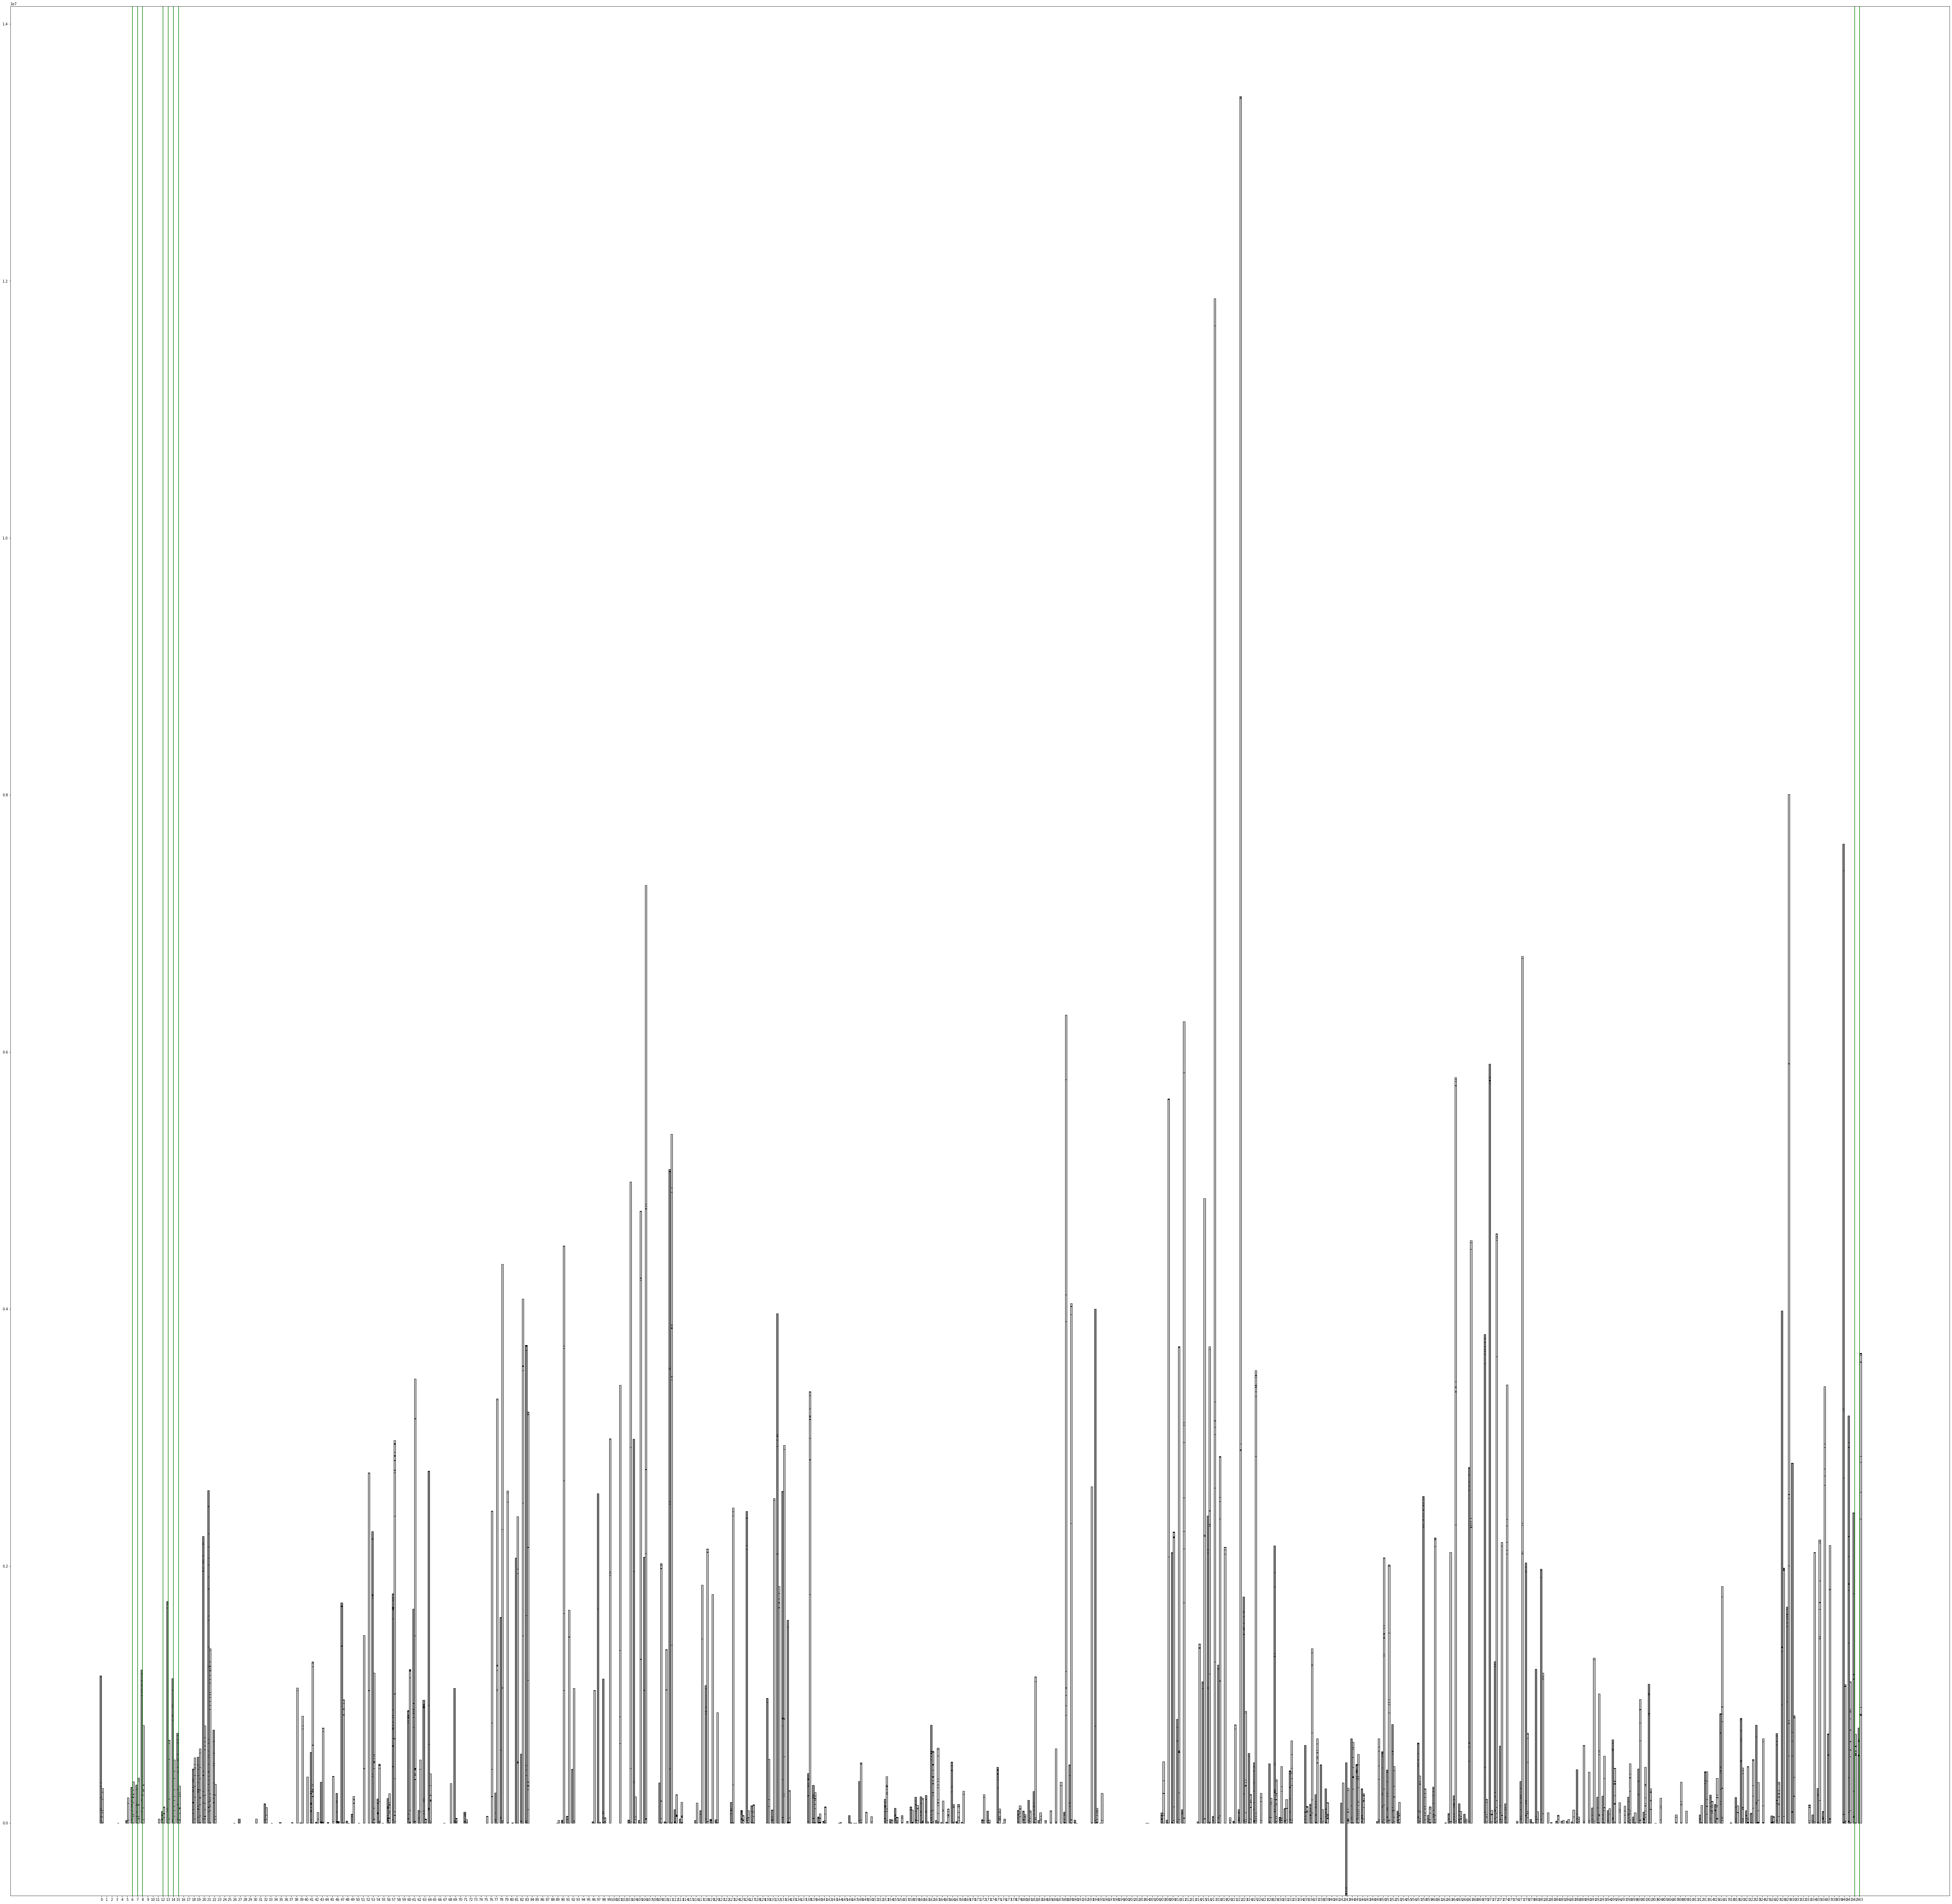

100%|██████████| 1/1 [00:19<00:00, 19.43s/it]


In [84]:
for cust in tqdm(custs[:1]):
    aks_c = alert[alert.alert_key.isin(custinfo[custinfo.cust_id==cust].alert_key)].sort_values(by=['date'])
    aks_c['sar_flag'] = label[label.alert_key.isin(aks_c.alert_key)].sort_values(by=['alert_key'])['sar_flag']
    aks_c.dropna(inplace=True)
    dp_c = dp[(dp.cust_id==cust) & (dp.date <= aks_c.date.values[-1])].sort_values(by=['date'])
    dp_c[dp_c.tx_amt < 0].loc['debit_credit'] = 'CR'
    dp_c[dp_c.tx_amt < 0].loc['tx_amt'] = dp_c[dp_c.tx_amt < 0].loc['tx_amt'].abs()
    dp_c.dropna(subset=['tx_amt'], inplace=True)
    if len(dp_c) > 0:
        plot_trans(dp_c, aks_c)

c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\PoChen\anaconda3\envs\tiles\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


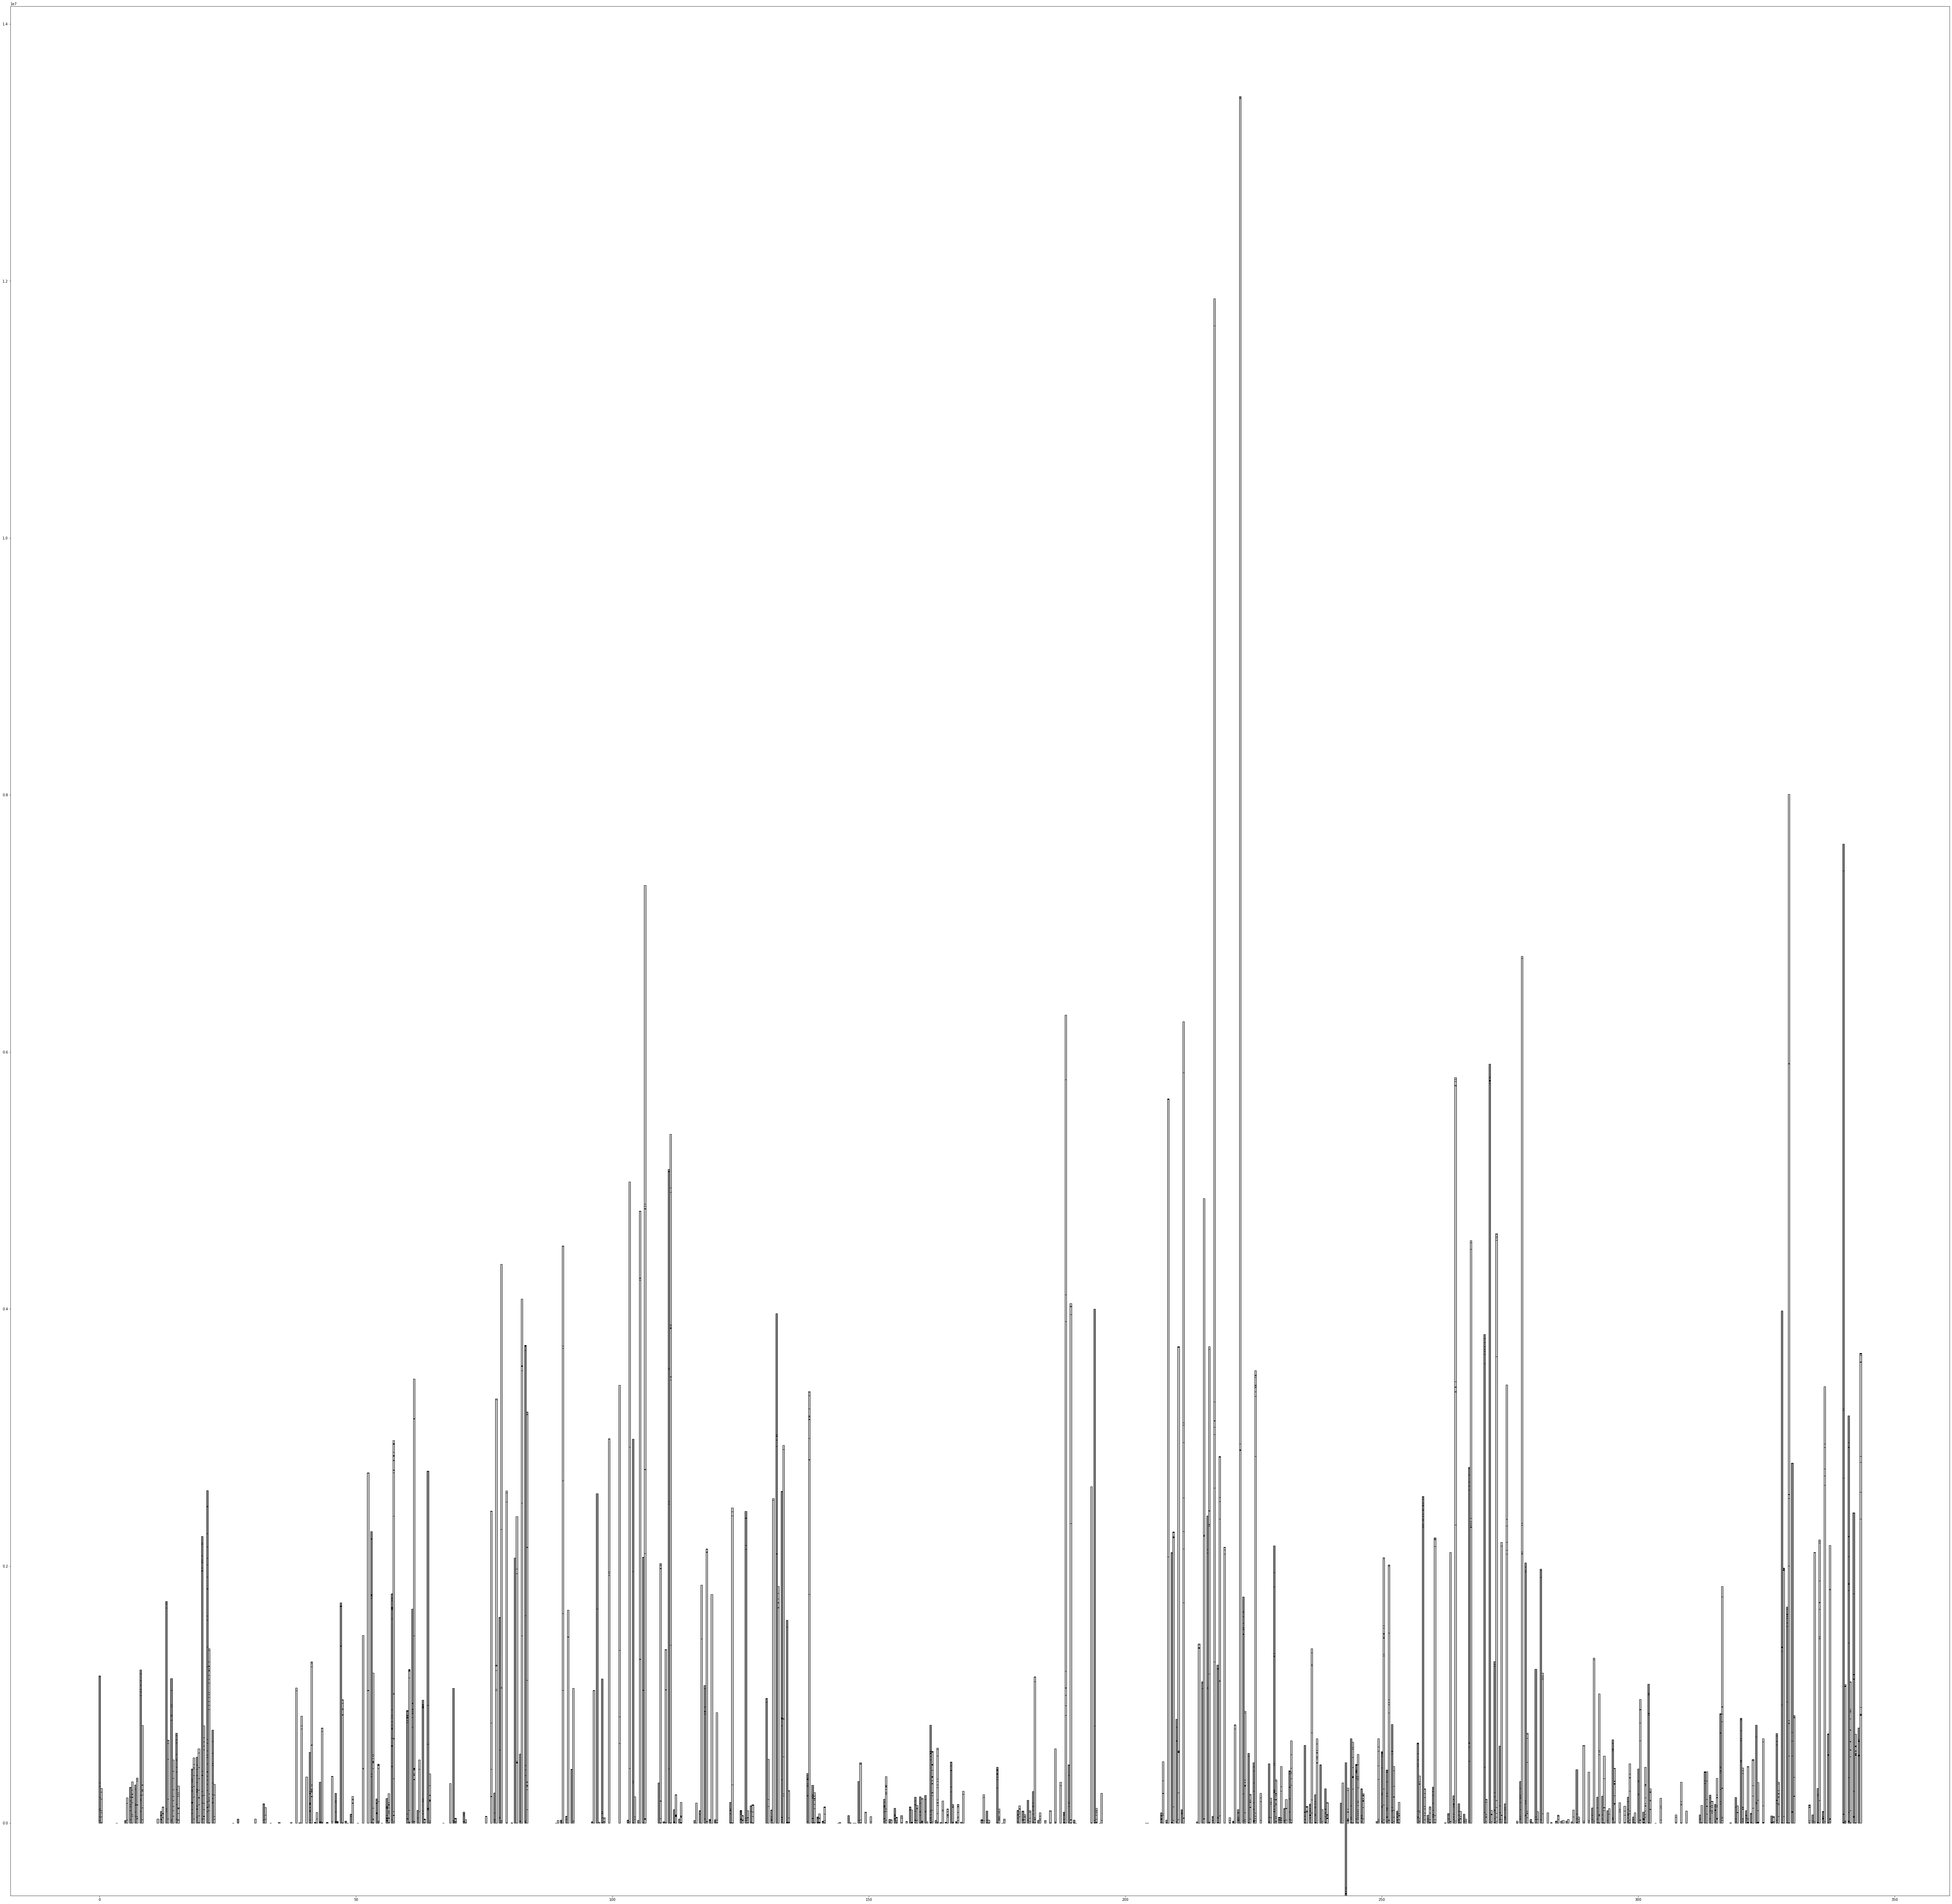

In [58]:
fig = plt.figure(figsize=(100,100))
width=0.35
for i in range(len(dp_c)):
    data = dp_c.iloc[i,:]
    if data.debit_credit == 'DB':
        plt.bar(data.date, data.tx_amt, width, bottom=dp_c.iloc[:i,:][(dp_c.date==data.date)&(dp_c.debit_credit=='DB')].tx_amt.sum(), color='grey', edgecolor='black')
    elif data.debit_credit == 'CR':
        plt.bar(data.date+width, data.tx_amt, width, bottom=dp_c.iloc[:i,:][(dp_c.date==data.date)&(dp_c.debit_credit=='CR')].tx_amt.sum(), color='silver', edgecolor='black')

In [36]:
aks_c

,alert_key,date,sar_flag
381,172802,6,0.0
455,174202,7,0.0
571,174952,8,0.0
1622,177764,12,0.0
1965,178768,13,0.0
2128,179721,14,0.0
2190,180364,15,0.0
22462,339075,342,0.0
22518,339581,343,0.0
9,352249,365,NaN


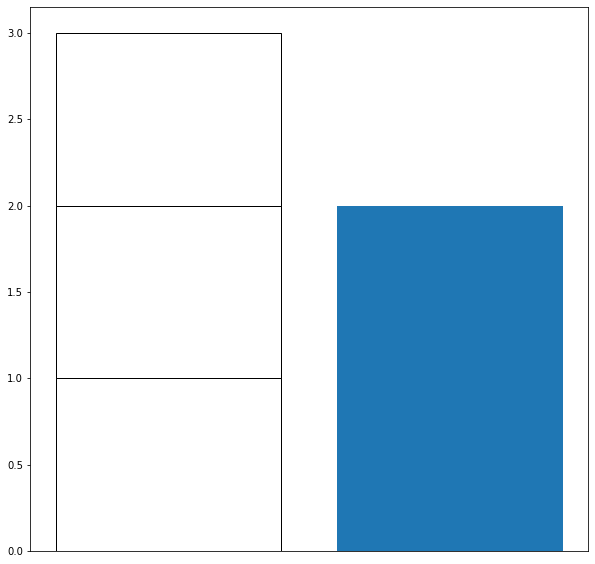

In [17]:
fig = plt.figure(figsize=(10,10))
plt.bar(0,1, color='w', edgecolor='black')
plt.bar(1,2)
plt.bar(0,1, bottom=[1], color='w', edgecolor='black')
plt.bar(0,1, bottom=[2], color='w', edgecolor='black')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()